## Mini-Assignment - Type Classification | TMNIST Alphabet

### AIM
Perform an extensive search to find a detailed guide on building a handwritten digit classification model using the 'Hello World' program for the MNIST dataset. Afterward, develop an equally rigorous tutorial for one of the TMNIST datasets.

## Preface
The categorization of handwritten digits is a crucial aspect of computer vision with diverse applications such as optical character recognition and signature verification. While the MNIST dataset is a widely used benchmark for evaluating classification algorithms in the machine learning community, it mainly consists of handwritten digits, potentially limiting its representation of various font styles.

In contrast, the TMNIST dataset introduces a distinctive dimension to digit classification by incorporating images of digits based on different typefaces generated using Google fonts. This tutorial aims to guide you through the process of implementing a model for handwritten digit classification using the TMNIST dataset. It covers essential steps in data preprocessing, feature extraction, and the application of machine learning algorithms to develop a precise and efficient classification model.

For those new to neural network classification and eager to grasp the fundamentals of creating and training a basic model, this tutorial serves as an excellent entry point. The straightforward step-by-step instructions will empower you with the knowledge needed to construct your neural network classification model tailored to the TMNIST dataset. Furthermore, the tutorial offers insights into evaluating and visualizing the model's performance.

Whether you're a novice or someone looking to enhance your machine learning expertise, this tutorial provides practical tools and knowledge to build and refine your neural network classification models.

## Dataset
TMNIST stands out as a database providing a distinctive perspective on the well-established MNIST database, renowned for its application in handwritten digit classification.
MNIST style images of the following 94 alphabetic characters:

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\', ']', '^', '_', '`', '{', '|', '}', '~'}

In this dataset, the first row contains column headers ['names', 'labels','1','2',…..'784'], the 'names' column contains font file names such as 'Acme-Regular' and 'ZillaSlab-Bold', the 'labels' column contains characters such as '@','E' or '+', the remaining 784 columns contain the grayscale pixel values for the image of the corresponding character in the 'name' font-style.

Enclosed within a singular file named "TMNIST_Data.csv," this dataset contains over 281,000 images and is part of the Warhol.ai Computational Creativity and Cognitive Type projects.

Kaggle Link: https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters/

In [ ]:
#Importing required libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import pandas as pd
dataset = pd.read_csv('94_character_TMNIST.csv')

In [ ]:
dataset.describe()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,188780.0,188780.0,188780.0,188780.0,188780.0,188780.0,188780.0,188780.0,188780.000000,188780.000000,...,188779.000000,188779.000000,188779.000000,188779.000000,188779.000000,188779.000000,188779.000000,188779.000000,188779.000000,188779.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001483,0.002156,...,0.003147,0.001796,0.001097,0.000562,0.000440,0.000355,0.000297,0.000048,0.000048,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.573185,0.595612,...,0.372955,0.199964,0.138109,0.078589,0.071422,0.066903,0.064279,0.015439,0.015439,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,248.000000,245.000000,...,103.000000,59.000000,40.000000,19.000000,19.000000,19.000000,19.000000,6.000000,6.000000,0.0


In [ ]:
dataset.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Examine the data
Utilize a variety of functions provided by the pandas library to thoroughly investigate the dataset under examination. This involves extracting essential information regarding the data's structure and content, encompassing its overall dimensions, as well as the different columns and labels it encompasses. By strategically applying these analytical tools, a detailed and insightful representation of the dataset can be generated, aiding in the recognition of notable trends, patterns, or anomalies that might exist within the data.

In [ ]:
dataset.shape

(188780, 786)

In [ ]:
dataset['labels'].unique()

array(['6', 'D', 'f', '/', 'F', 'x', 'J', '8', 'H', 'k', '@', '1', '=',
       'g', ')', '2', 'd', '^', '3', 't', '#', '.', '4', 'o', '"', 'y',
       'A', 'u', 'G', '-', 'm', 'W', '&', 'c', '9', 'N', ']', 'P', 'X',
       '|', '}', 'h', '7', 'j', '5', '>', '?', 'b', '*', 'w', 'l', '0',
       '$', 'I', 'Y', '%', ':', 'T', 'K', 'E', '<', 'V', '{', 'M', 'S',
       'a', 'i', 'r', "'", 'p', ';', '[', '+', 'e', 'U', '(', 's', '~',
       ',', 'C', 'q', '_', 'n', 'B', 'z', 'v', 'O', 'R', '`', 'Z', 'Q',
       'L', '!', '\\'], dtype=object)

In [ ]:
dataset['labels'].nunique()

94

In [ ]:
# Dropping columns that are redundant like names and labels from the training frames and keeping only pixel values
X = dataset.drop(columns={'names','labels'})
y = dataset[['labels']]

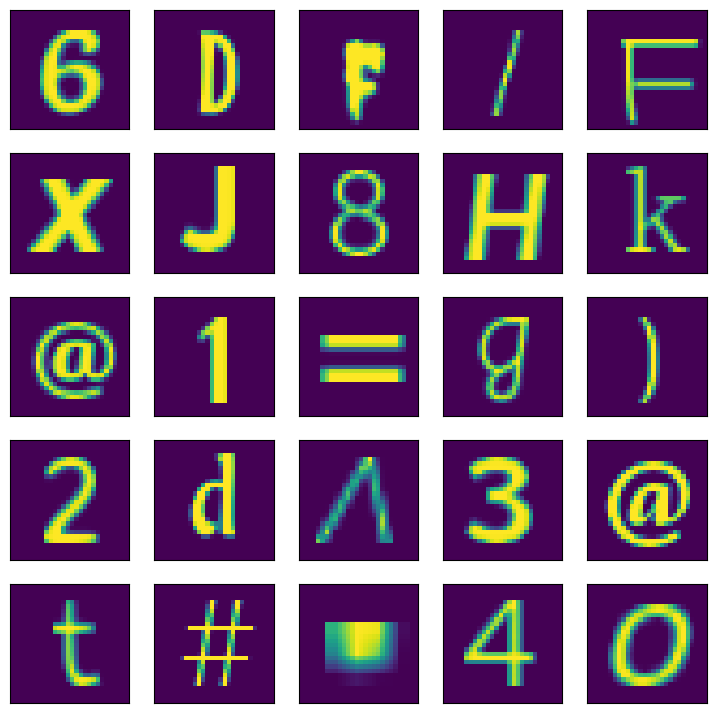

In [ ]:
# data exploration and visualization aimed at examining the integrity and content of a dataset named X.
# dealing with image data, related to handwritten digits, given the shape and the reshaping operation performed.

# reshape the data in the X variable into a 3D array where each entry corresponds to a 28x28 pixel image.
X_images = X.values.reshape(-1,28,28) # -1 in the reshape operation infers the size of the first dimension, while 28 and 28 are the dimensions of the image.

# create a 5x5 grid of subplots for visualizing the images
fig, axs = plt.subplots(5, 5, figsize=(9, 9))

#  loop through the first 25 images in the reshaped dataset (X_images) and plot them on the subplots.
for i in range(25):
    r = i // 5
    c = i % 5
    axs[r][c].set_xticks([]) # set_xticks([]) and set_yticks([]) commands remove the ticks on the x and y axes, and imshow displays the image.
    axs[r][c].set_yticks([])
    axs[r][c].imshow(X_images[i])

# display the grid of images
plt.show()

In [ ]:
# import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Spliting training set using 85% of data and test set using 15% of data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1) # ensures reproducibility by fixing the random seed

# reshape into a 2D array with a single column
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))

In [ ]:
X_train.shape, X_test.shape

((160463, 784), (28317, 784))

In [ ]:
y_train.shape, y_test.shape

((160463, 1), (28317, 1))

### Pre-processing input for neural network

In [ ]:
from sklearn.preprocessing import LabelBinarizer
# Using LabelBinarizer to map characters to numbers

lab = LabelBinarizer()
y_train_final = lab.fit_transform(y_train)
y_test_final = lab.transform(y_test)
print('Train labels dimension:');
print(y_train.shape)
print('Test labels dimension:');
print(y_test.shape)

Train labels dimension:
(160463, 1)
Test labels dimension:
(28317, 1)


In [ ]:
# Normalizing the Dataset for the Neural Network
X_train, X_test = X_train/255, X_test/255

### Fully connected neural networks
Fully connected neural networks, commonly known as dense neural networks, represent a form of artificial neural network structure in which every neuron within a layer establishes connections with every neuron in neighboring layers. The transmission of information occurs from the input layer through intermediary hidden layers to the output layer, facilitated by weighted connections featuring adaptable weights. Activation functions are employed to compute neuron activations. While dense neural networks find application in diverse tasks for discerning intricate patterns in data, they can pose computational challenges and vulnerability to overfitting. Consequently, regularization techniques are essential to enhance performance and promote generalization.

In [ ]:
!pip install tensorflow

In [ ]:
# import necessary TensorFlow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

# import Adam optimizer for training neural networks
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score # common metric for classification accuracy

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(500, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(y_train_final.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Compile the model with specified optimizer and loss function

# Use Adam optimizer with default parameters
optimizer  = Adam(learning_rate=0.01)
callback =EarlyStopping(monitor='loss', patience=5)

# Use categorical cross-entropy as the loss function
loss = 'categorical_crossentropy'
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 dense_2 (Dense)             (None, 125)               31375     
                                                                 
 dense_3 (Dense)             (None, 94)                11844     
                                                                 
Total params: 560969 (2.14 MB)
Trainable params: 560969 (2.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The initial dense layer exhibits an output shape of (None, 500), signifying the presence of 500 neurons in this layer. It encompasses 392,500 trainable parameters, encompassing the modifiable weights and biases that undergo updates in the course of training.

In the subsequent dense layer, the output shape is (None, 250), featuring 125,250 trainable parameters.

Moving on to the third dense layer, its output shape is (None, 125), with 31,375 trainable parameters.

The fourth and ultimate dense layer has an output shape of (None, 94), involving 11,844 trainable parameters.

In total, the model comprises 560,969 trainable parameters, subject to adjustments during training to acquire representations from the input data. The presence of "None" in the output shapes signifies the model's capability to accommodate varying batch sizes during both training and inference.

In [ ]:
# Configure the model and start training

# batch size = 128 shows number of samples used in each iteration for updating the model's weights
model_history = model.fit(X_train, y_train_final, epochs=20, batch_size=128, verbose=2) # 15% of the training data is set aside for validation during training

Epoch 1/20
1254/1254 - 32s - loss: 0.7870 - accuracy: 0.7701 - 32s/epoch - 26ms/step
Epoch 2/20
1254/1254 - 18s - loss: 0.6015 - accuracy: 0.8212 - 18s/epoch - 14ms/step
Epoch 3/20
1254/1254 - 18s - loss: 0.5908 - accuracy: 0.8281 - 18s/epoch - 14ms/step
Epoch 4/20
1254/1254 - 18s - loss: 0.5615 - accuracy: 0.8365 - 18s/epoch - 15ms/step
Epoch 5/20
1254/1254 - 17s - loss: 0.5702 - accuracy: 0.8363 - 17s/epoch - 14ms/step
Epoch 6/20
1254/1254 - 17s - loss: 0.5550 - accuracy: 0.8421 - 17s/epoch - 14ms/step
Epoch 7/20
1254/1254 - 20s - loss: 0.5583 - accuracy: 0.8422 - 20s/epoch - 16ms/step
Epoch 8/20
1254/1254 - 18s - loss: 0.5515 - accuracy: 0.8449 - 18s/epoch - 14ms/step
Epoch 9/20
1254/1254 - 18s - loss: 0.5632 - accuracy: 0.8437 - 18s/epoch - 14ms/step
Epoch 10/20
1254/1254 - 17s - loss: 0.5529 - accuracy: 0.8469 - 17s/epoch - 14ms/step
Epoch 11/20
1254/1254 - 20s - loss: 0.5484 - accuracy: 0.8481 - 20s/epoch - 16ms/step
Epoch 12/20
1254/1254 - 17s - loss: 0.5542 - accuracy: 0.8469 -

In [ ]:
# model.evaluate(X_test,y_test_final,verbose = 0)
# print(f"Test Accuracy:{round(score[1],4)*100}%")

result = model.evaluate(X_test, y_test_final, verbose=0)
test_accuracy = result[1] * 100
print(f'Test results - Accuracy: {test_accuracy:.2f}%')

Test results - Accuracy: 82.27%


In [ ]:
prediction = model.predict(X_test)
prediction = lab.inverse_transform(prediction)  # Convert class labels to original labels
accuracy = accuracy_score(y_test, prediction) * 100  # Compute accuracy
print(f'Test results - Accuracy: {accuracy}%')

885/885 [==============================] - 6s 6ms/step
Test results - Accuracy: 82.26507045237842%


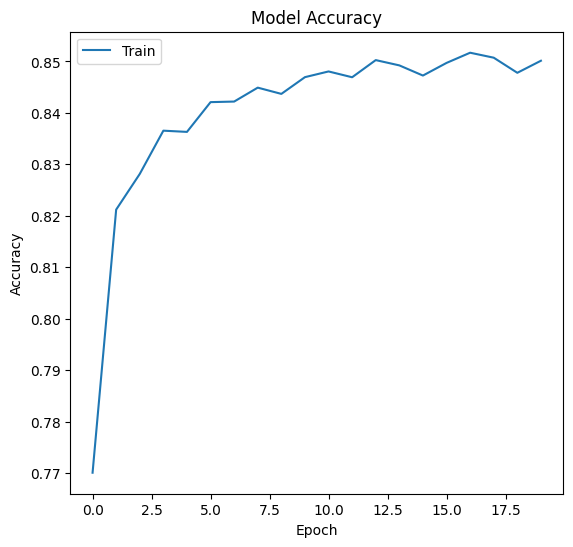

In [ ]:
# Plot accuracy versus epochs
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

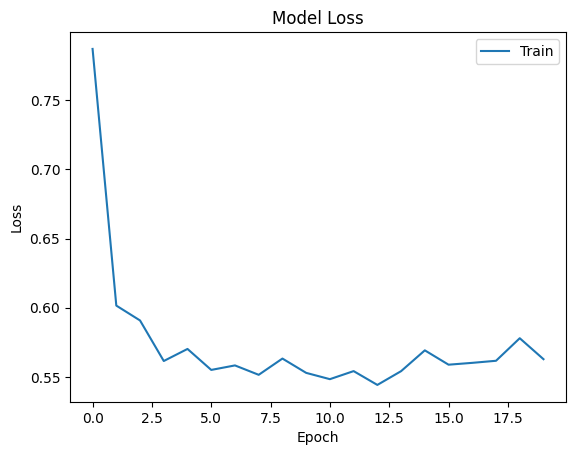

In [ ]:
# Plot the loss versus epochs
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()